## Load Data

In [17]:
from data import c3d 

In [18]:
train, val, test = c3d.load_data()

  0%|          | 8/5384 [00:00<01:08, 78.35it/s]

Data has apparently already been downloaded and unpacked.


100%|██████████| 6493/6493 [00:31<00:00, 205.18it/s]


## Preprocess Data:

In [19]:
from models.Tweets_classifier import TweetsPreprocessing

In [20]:
clean_train = TweetsPreprocessing.clean_tweets(train.features) 
clean_val = TweetsPreprocessing.clean_tweets(val.features) 
for i in range(10):
    print(clean_train[i],"\n")

100%|██████████| 2227/2227 [00:02<00:00, 744.94it/s]

 season start start come school look like homeless person slightly_smiling_face ok_hand_medium light_skin_tone woman_swimming_light_skin_tone 

 never like anyway url 

 retweeted aries spear user think disgustin disrespectful black folks short sight url 

 user depression mental disorder cannot help diagnose like not fuck come at mental illness 

 user yikes hate stuff 

 bitch meth not tweak much url 

 diagnose severe depression number 

 can friends ur man ex — love mirna fab fuck plus fuck not like number url 

 user diagnose severe depression resist meds make worse 

 user diagnose depression anxiety multiple therapists take four different kinds  



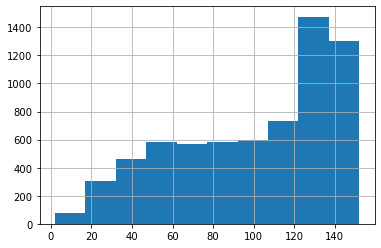

count    6680.000000
mean       99.333683
std        37.966801
min         2.000000
25%        68.000000
50%       110.000000
75%       135.000000
max       152.000000
dtype: float64

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
tweet_len= [len(x) for x in train.features]
pd.Series(tweet_len).hist()
plt.show()
pd.Series(tweet_len).describe()

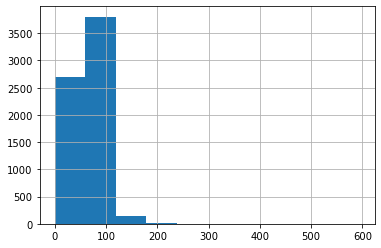

count    6680.000000
mean       65.040569
std        29.516288
min         0.000000
25%        45.000000
50%        66.000000
75%        82.000000
max       594.000000
dtype: float64

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
tweet_len= [len(x) for x in clean_train]
pd.Series(tweet_len).hist()
plt.show()
pd.Series(tweet_len).describe()

## LSTM:

In [21]:
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D
from keras.callbacks import EarlyStopping, ModelCheckpoint,TensorBoard

In [22]:
DEFAULT_PREPROCESS=False
DEFAULT_MAX_WORDS = 8192
DEFAULT_MAX_LEN=200
def _prepare_data(x,y,preprocess=DEFAULT_PREPROCESS,max_phrase_len=DEFAULT_MAX_LEN,max_words=DEFAULT_MAX_WORDS):
    if preprocess==True:
        x=TweetsPreprocessing.clean_tweets(x) 
    tokenizer = Tokenizer(num_words = max_words,filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~')
    tokenizer.fit_on_texts(x)
    x = tokenizer.texts_to_sequences(x)
    x = pad_sequences(x, maxlen = max_phrase_len) #max len is the maximum length of a sentence 
    y=to_categorical(y, num_classes=2, dtype="int")
    return x,y
    

In [12]:
x_train,y_train=_prepare_data(train.features,train.labels)
x_val,y_val=_prepare_data(val.features,val.labels)
x_test,y_test=_prepare_data(test.features,test.labels)

In [15]:
train.features[1],y_train[1]

("@FMLrayhey i wish i could be happy... But for me... I have serious problems. And by setups i mean. I'm diagnosed with depression.. Its a",
 array([1, 0]))

In [48]:
#hyper parameters
batch_size = 512
epochs = 20

In [49]:
max_words=DEFAULT_MAX_WORDS
max_phrase_len=DEFAULT_MAX_LEN

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(256, dropout=0.5, recurrent_dropout=0.5))
model_lstm.add(Dense(256, activation = 'relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(2, activation = 'sigmoid'))
model_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)
#We use dropout to prevent overfitting.
#Warning  concerning low level TensorFlow ops and can be safely ignored

In [6]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 256)          2097152   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 256)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 2,688,770
Trainable params: 2,688,770
Non-trainable params: 0
____________________________________________

In [19]:
history=model_lstm.fit(x_train, y_train, batch_size,epochs, verbose=2,
              validation_data=(x_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 6680 samples, validate on 2227 samples
Epoch 1/8
6680/6680 [==============================] - 82s 12ms/step - loss: 0.2333 - accuracy: 0.9597 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 2/8
6680/6680 [==============================] - 78s 12ms/step - loss: 1.3742e-07 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 3/8
6680/6680 [==============================] - 80s 12ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 4/8
6680/6680 [==============================] - 79s 12ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 5/8
6680/6680 [==============================] - 80s 12ms/step - loss: 1.1928e-07 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 6/8
6680/6680 [==============================] - 79s 12ms/step - loss: 1.1921e-07 - accura

In [22]:
loss, test_accuracy = model_lstm.evaluate(x_test, y_test, verbose=2)

2970/2970 [==============================] - 21s 7ms/step


In [23]:
loss

0.0

In [24]:
test_accuracy

1.0

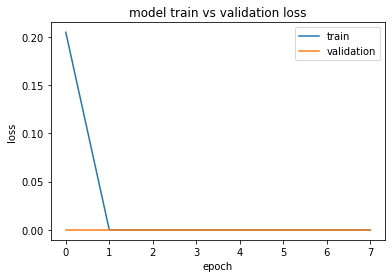

In [25]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [26]:
# save model and architecture to single file
model_lstm.save("model_lstm.h5")
print("Saved model to disk")

Saved model to disk


### LSTM with preprocessed data:

In [9]:
x_train,y_train=_prepare_data(train.features,train.labels,preprocess=True)
x_val,y_val=_prepare_data(val.features,val.labels,preprocess=True)
x_test,y_test=_prepare_data(test.features,test.labels,preprocess=True)

100%|██████████| 2970/2970 [00:03<00:00, 836.07it/s]


In [13]:
history_prep=model_lstm.fit(x_train, y_train, batch_size,epochs, verbose=2,
              validation_data=(x_val,y_val))


Train on 6680 samples, validate on 2227 samples
Epoch 1/8
6680/6680 [==============================] - 100s 15ms/step - loss: 0.2057 - accuracy: 0.9588 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/8
6680/6680 [==============================] - 98s 15ms/step - loss: 3.5691e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/8
6680/6680 [==============================] - 98s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/8
6680/6680 [==============================] - 98s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/8
6680/6680 [==============================] - 98s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/8
6680/6680 [==============================] - 97s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/8
6680/6680 [===============

In [14]:
loss, test_accuracy = model_lstm.evaluate(x_test, y_test, verbose=True)

2970/2970 [==============================] - 21s 7ms/step


In [15]:
loss, test_accuracy

(0.0, 1.0)

In [16]:
# save model and architecture to single file
model_lstm.save("model_lstm_prep.h5")
print("Saved model to disk")

Saved model to disk


## Other data 

In [7]:
import pandas as pd

df = pd.read_csv("data/mood_tweets.csv")
df.drop(df.columns[0], inplace=True, axis=1)
df["tweet"] = df["tweet"].astype(str)
df.describe()

,class,tweet
count,25758,25758
unique,6,25758
top,cheerful,Thanks to the judges organizers and student vo...
freq,5885,1


In [8]:
df["class"].unique()

array(['suicidal', 'happy', 'depressed', 'overjoyed', 'sad', 'cheerful'],
      dtype=object)

In [9]:
from tqdm import trange

In [10]:
df["target"] = 1

In [11]:
for i in trange(len(df)):
    if  df["class"][i] in ['cheerful', 'happy', 'overjoyed']:
        df["target"][i]=0

  0%|          | 0/25758 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 25758/25758 [00:01<00:00, 13848.52it/s]


In [12]:
df.head()

,class,tweet,target
0,suicidal,"""He was lost & scared"" says a Newport woman ab...",1
1,suicidal,@TheDumbMedico Ameen. Or ye suicide wali bat a...,1
2,suicidal,You showed the leak in @HouseofCommons today @...,1
3,suicidal,The number in my bio is for a Suicide hotline ...,1
4,suicidal,cw: suicidal ideation it's unsurprisingly hard...,1


In [13]:
texts = df["tweet"].tolist()
labels = df["target"].tolist()

In [14]:
x,y=_prepare_data(x=texts,y=labels)

In [32]:
texts[4],labels[4]

("cw: suicidal ideation it's unsurprisingly hard to talk about wanting to die but it's even more difficult to express that it both is and isn't as heavy as it sounds. i and so many live with and manage this every day and we should talk about it more. ",
 1)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=2020)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=.15,random_state=2020)


In [17]:
len(x_train),len(x_val),len(x_test)

(16420, 2898, 6440)

In [50]:
my_callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1,mode='auto', restore_best_weights=True),
    ModelCheckpoint(filepath='model.lstm-{val_loss:.2f}.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max'),
    TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
]

In [19]:
history_tweet=model_lstm.fit(x_train, y_train, batch_size,epochs, verbose=2,
              validation_data=(x_val,y_val),callbacks=my_callbacks)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 16420 samples, validate on 2898 samples


Epoch 1/20
 - 375s - loss: 0.6167 - accuracy: 0.6416 - val_loss: 0.2907 - val_accuracy: 0.8961

Epoch 00001: val_accuracy improved from -inf to 0.89614, saving model to model.lstm-0.29.h5

Epoch 2/20
 - 363s - loss: 0.2064 - accuracy: 0.9212 - val_loss: 0.1118 - val_accuracy: 0.9576

Epoch 00002: val_accuracy improved from 0.89614 to 0.95756, saving model to model.lstm-0.11.h5
Epoch 3/20
 - 371s - loss: 0.0849 - accuracy: 0.9712 - val_loss: 0.0722 - val_accuracy: 0.9724

Epoch 00003: val_accuracy improved from 0.95756 to 0.97239, saving model to model.lstm-0.07.h5
Epoch 4/20
 - 377s - loss: 0.0594 - accuracy: 0.9831 - val_loss: 0.0676 - val_accuracy: 0.9727

Epoch 00004: val_accuracy improved from 0.97239 to 0.97274, saving model to model.lstm-0.07.h5
Epoch 5/20
 - 371s - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.0780 - val_accuracy: 0.96

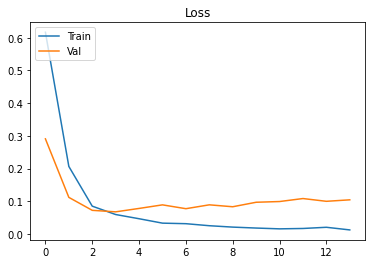

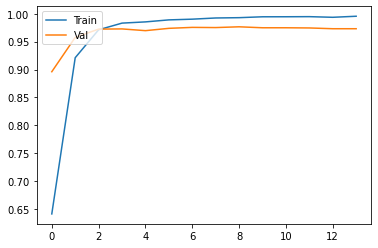

In [20]:
import matplotlib.pyplot as plt
loss_curve = history_tweet.history["loss"]
acc_curve = history_tweet.history["accuracy"]
loss_val_curve = history_tweet.history["val_loss"]
acc_val_curve = history_tweet.history["val_accuracy"]
plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()
plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')

In [21]:
# save model and architecture to single file
model_lstm.save("model_data2_lstm.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
accr = model_lstm.evaluate(x_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

6440/6440 [==============================] - 68s 10ms/step
Test set
  Loss: 0.073
  Accuracy: 0.976


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
Y_pred = model_lstm.predict(x_test)

In [25]:

y_pred = np.argmax(Y_pred, axis=1)
y_classes = [np.argmax(y) for y in y_test]

In [26]:
y_classes=np.array(y_classes)

In [27]:
print('Confusion Matrix')
print(confusion_matrix(y_classes, y_pred))
print('Classification Report')
target_names = ['Depressed', 'Not depressed']
print(classification_report(y_classes, y_pred, target_names=target_names))

Confusion Matrix
[[3623   80]
 [  74 2663]]
Classification Report
               precision    recall  f1-score   support

    Depressed       0.98      0.98      0.98      3703
Not depressed       0.97      0.97      0.97      2737

     accuracy                           0.98      6440
    macro avg       0.98      0.98      0.98      6440
 weighted avg       0.98      0.98      0.98      6440



## LSTM for preprocessed Data:

In [51]:
x,y=_prepare_data(x=texts,y=labels,preprocess=True)

100%|██████████| 25758/25758 [00:52<00:00, 492.20it/s]


In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=2020)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=.15,random_state=2020)


In [53]:
history_tweet2=model_lstm.fit(x_train, y_train, batch_size,epochs, verbose=2,
              validation_data=(x_val,y_val),callbacks=my_callbacks)

Train on 16420 samples, validate on 2898 samples
Epoch 1/20
 - 344s - loss: 0.5343 - accuracy: 0.7149 - val_loss: 0.1582 - val_accuracy: 0.9458

Epoch 00001: val_accuracy improved from -inf to 0.94582, saving model to model.lstm-0.16.h5
Epoch 2/20
 - 339s - loss: 0.1291 - accuracy: 0.9548 - val_loss: 0.0618 - val_accuracy: 0.9758

Epoch 00002: val_accuracy improved from 0.94582 to 0.97585, saving model to model.lstm-0.06.h5
Epoch 3/20
 - 336s - loss: 0.0563 - accuracy: 0.9822 - val_loss: 0.0440 - val_accuracy: 0.9834

Epoch 00003: val_accuracy improved from 0.97585 to 0.98344, saving model to model.lstm-0.04.h5
Epoch 4/20
 - 334s - loss: 0.0434 - accuracy: 0.9864 - val_loss: 0.0614 - val_accuracy: 0.9779

Epoch 00004: val_accuracy did not improve from 0.98344
Epoch 5/20
 - 336s - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0428 - val_accuracy: 0.9845

Epoch 00005: val_accuracy improved from 0.98344 to 0.98447, saving model to model.lstm-0.04.h5
Epoch 6/20
 - 331s - loss: 0.0244 - acc

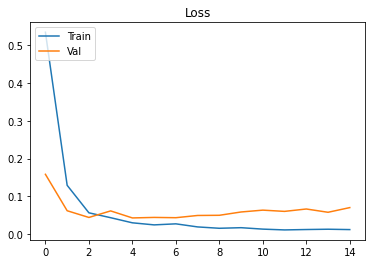

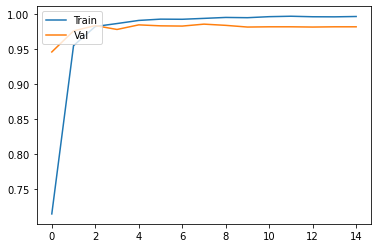

In [55]:
import matplotlib.pyplot as plt
loss_curve = history_tweet2.history["loss"]
acc_curve = history_tweet2.history["accuracy"]
loss_val_curve = history_tweet2.history["val_loss"]
acc_val_curve = history_tweet2.history["val_accuracy"]
plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()
plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')

In [56]:
accr = model_lstm.evaluate(x_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

6440/6440 [==============================] - 70s 11ms/step
Test set
  Loss: 0.055
  Accuracy: 0.984


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
Y_pred = model_lstm.predict(x_test)

NameError: name 'model_lstm' is not defined

In [61]:
y_pred = np.argmax(Y_pred, axis=1)
y_classes = [np.argmax(y) for y in y_test]

In [62]:
y_classes=np.array(y_classes)

In [63]:
print('Confusion Matrix')
print(confusion_matrix(y_classes, y_pred))
print('Classification Report')
target_names = ['Depressed', 'Not depressed']
print(classification_report(y_classes, y_pred, target_names=target_names))

Confusion Matrix
[[3649   54]
 [  51 2686]]
Classification Report
               precision    recall  f1-score   support

    Depressed       0.99      0.99      0.99      3703
Not depressed       0.98      0.98      0.98      2737

     accuracy                           0.98      6440
    macro avg       0.98      0.98      0.98      6440
 weighted avg       0.98      0.98      0.98      6440



In [64]:
# save model and architecture to single file
m=model_lstm.load("model_data3_lstm.h5")
print("Saved model to disk")

Saved model to disk


In [66]:
text=['I want to die this life suck I hate my self',
      'How people are gettin through their day??','I dont like pizza', "no one even care about me",
      "I hate my life","u dre",""]
label=[1,1,0,1,1]
xt,yt=_prepare_data(x=text,y=label, preprocess=True)
ytp=model_lstm.predict(xt)
y_predt = np.argmax(ytp, axis=1)
y_predt

100%|██████████| 7/7 [00:00<00:00, 604.24it/s]


array([1, 0, 0, 1, 0, 1, 1])

# Testing overfitiing:

In [34]:
from tensorflow import keras
model = keras.models.load_model('model_data3_lstm.h5')


In [51]:
text=['Life is short to be depressed ',
      'Find joy in little things of life',
      "I really hate this life I'm living I don't even understand why we are aloive ",
      "Enjoy you life, be grateful for every minute you spend with you lovedones, I really love my life.",
      "My tag line of life is 'Biti Baton pe dhul udata chala' a line from my favourite singer Kishore Kumar which Means just 'Forget the past' so I always think about future, no depression.",
      "Life is beautiful",
      "Hi my freinds i hope you are doing well i wanted just to say hello to you in this beautifull journy have a nice day "
       ,"Maybe nothing in this life happens by accident. As everything happens for a reason, our destiny slowly takes form...",
     "I sometimes wants to end my life though I know that everything will be okay soon ",
      "I can do better if I really want to do something.",
      "Spending a lot of your time scared and anxious is exhausting.  I was lucky to meet some amazing women in my thirties who made me realise that all the stuff I've been paranoid about since I was a teenager was universal.  Weight, skin, feminism and pubes, all open topics of discussion that made me wish I had known women like them in my teenage years.",
      "I think life is just spending time with a really bd depression and dying at the end",
      "I can overthink it because I'm already overthinking my overthinking thank you depression"
     
     ]
label=[0,0,1,0,0,0,0,1,1,1,1,1,1]


In [52]:
xt,yt=_prepare_data(x=text,y=label, preprocess=True)


100%|██████████| 13/13 [00:00<00:00, 399.40it/s]


In [53]:
ytp=model.predict(xt)
y_predt = np.argmax(ytp, axis=1)


In [54]:
y_predt

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [55]:
print('Confusion Matrix')
print(confusion_matrix(label, y_predt))
print('Classification Report')
target_names = ['Depressed', 'Not depressed']
print(classification_report(label, y_predt, target_names=target_names))

Confusion Matrix
[[4 2]
 [3 4]]
Classification Report
               precision    recall  f1-score   support

    Depressed       0.57      0.67      0.62         6
Not depressed       0.67      0.57      0.62         7

     accuracy                           0.62        13
    macro avg       0.62      0.62      0.62        13
 weighted avg       0.62      0.62      0.62        13

